In [1]:
#Data Visualization Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
import numpy as np
import plotly.express as px
from collections import Counter
from scipy import stats

In [2]:
#ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_percentage_error

In [7]:
df = pd.read_csv("C:\\Users\\caiob\\OneDrive\\Desktop\\RunWiser\\fitness_tracker_dataset.csv")
df.describe()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
count,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,856880,1000000,1000000,1000000
unique,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,6,4,5,4
top,NaN,2025-09-26,NaN,NaN,NaN,NaN,NaN,NaN,Cycling,Fog,Home,Happy
freq,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,143115,250417,200543,250654
mean,499.550302,NaN,15005.767061,2750.008148,9.994465,719.418241,6.000228,119.458316,NaN,NaN,NaN,NaN
std,288.166608,NaN,8659.195341,721.473950,5.774298,415.894771,3.463977,34.654034,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,1500.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN,NaN,NaN
25%,250.000000,NaN,7492.000000,2125.517500,4.990000,359.000000,3.000000,89.000000,NaN,NaN,NaN,NaN
50%,499.000000,NaN,15020.000000,2748.310000,9.990000,719.000000,6.000000,119.000000,NaN,NaN,NaN,NaN
75%,749.000000,NaN,22507.000000,3375.190000,14.990000,1080.000000,9.000000,149.000000,NaN,NaN,NaN,NaN


In [4]:
missing_values = df.isnull().sum()

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
data_encoded = pd.get_dummies(df, columns=['workout_type', 'weather_conditions', 'location', 'mood'], drop_first=True)

In [7]:
data_description = data_encoded.describe()

In [8]:
scaler = StandardScaler()
columns_to_normalize = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'heart_rate_avg']
data_encoded[columns_to_normalize] = scaler.fit_transform(data_encoded[columns_to_normalize])

In [9]:
z_scores = stats.zscore(data_encoded[columns_to_normalize])
outliers = (abs(z_scores) > 3).sum()

In [10]:
data_encoded['steps_per_km'] = data_encoded['steps'] / (data_encoded['distance_km'] + 1e-5)
data_encoded['active_minutes_ratio'] = data_encoded['active_minutes'] / 1440

In [11]:
correlation_matrix_standardized = data_encoded[['steps', 'calories_burned', 'distance_km', 'active_minutes', 'heart_rate_avg', 
                                   'steps_per_km', 'active_minutes_ratio']].corr()

In [12]:
print("Missing values per column:\n", missing_values)
print("\nDescriptive statistics:\n", data_description)
print("\nNumber of potential outliers per column:\n", outliers)
print("\nCorrelation matrix:\n", correlation_matrix_standardized)

Missing values per column:
 user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          143120
weather_conditions         0
location                   0
mood                       0
dtype: int64

Descriptive statistics:
               user_id                 date           steps  calories_burned  \
count  1000000.000000              1000000  1000000.000000   1000000.000000   
mean       499.550302  2024-05-14 12:00:00    15005.767061      2750.008148   
min          1.000000  2023-01-01 00:00:00        0.000000      1500.000000   
25%        250.000000  2023-09-07 18:00:00     7492.000000      2125.517500   
50%        499.000000  2024-05-14 12:00:00    15020.000000      2748.310000   
75%        749.000000  2025-01-19 06:00:00    22507.000000      3375.190000   
max        999.000000  2025-09-2

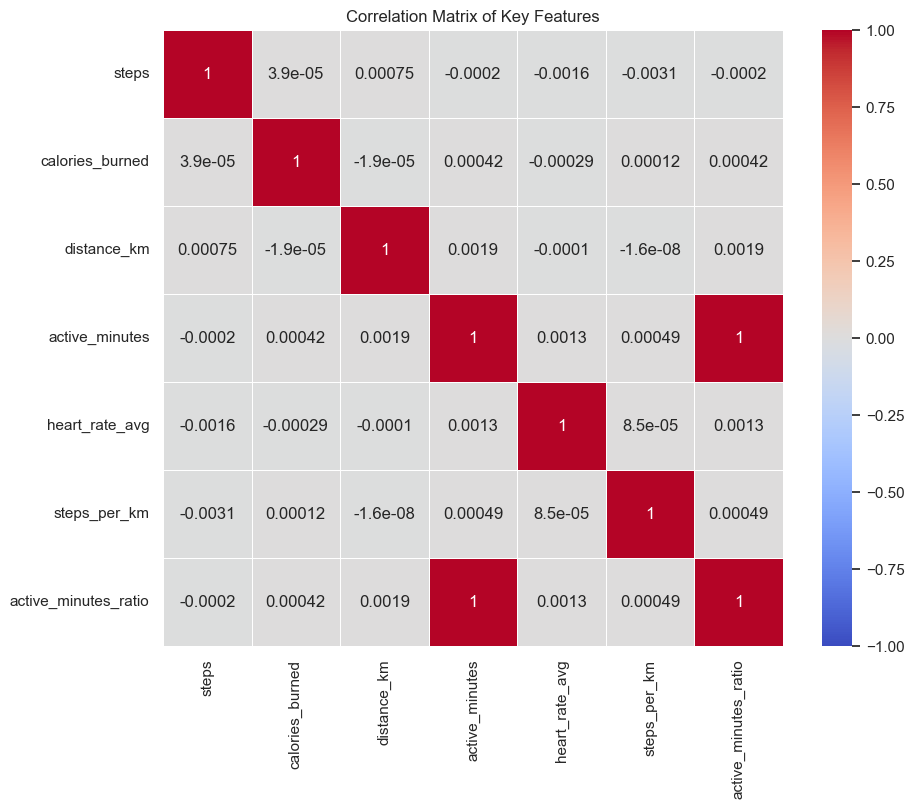

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_standardized, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

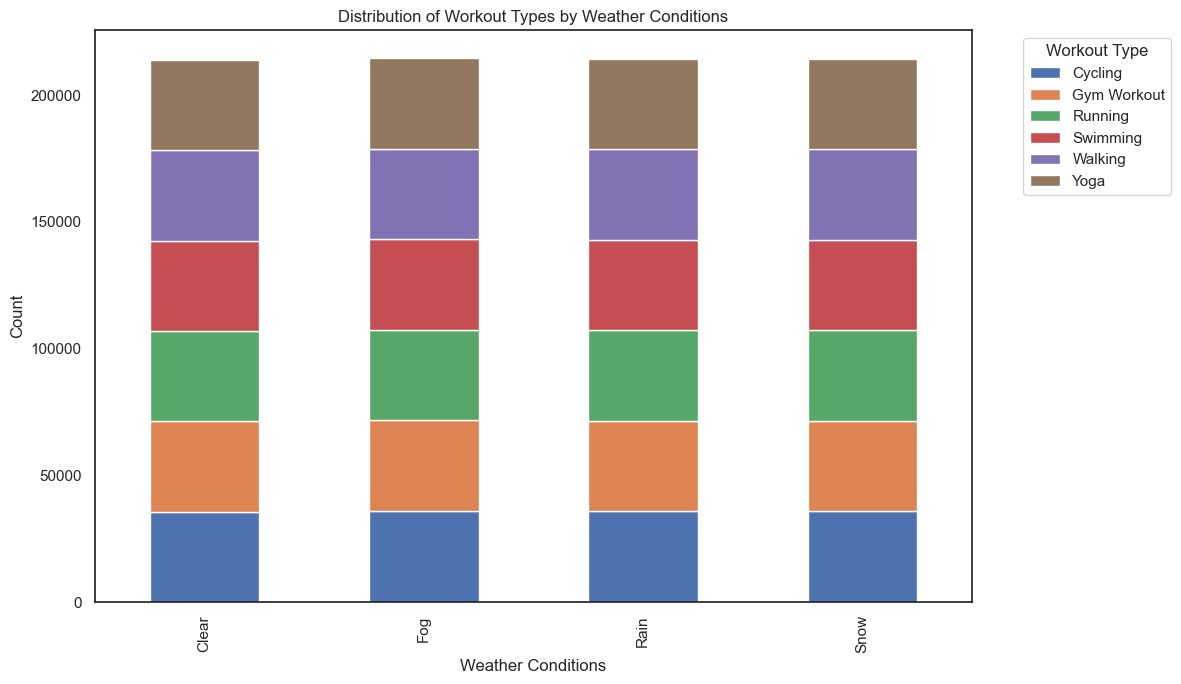

In [14]:
weather_workout_distribution = df.groupby(['weather_conditions', 'workout_type']).size().unstack()

weather_workout_distribution.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Workout Types by Weather Conditions')
plt.ylabel('Count')
plt.xlabel('Weather Conditions')
plt.legend(title="Workout Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

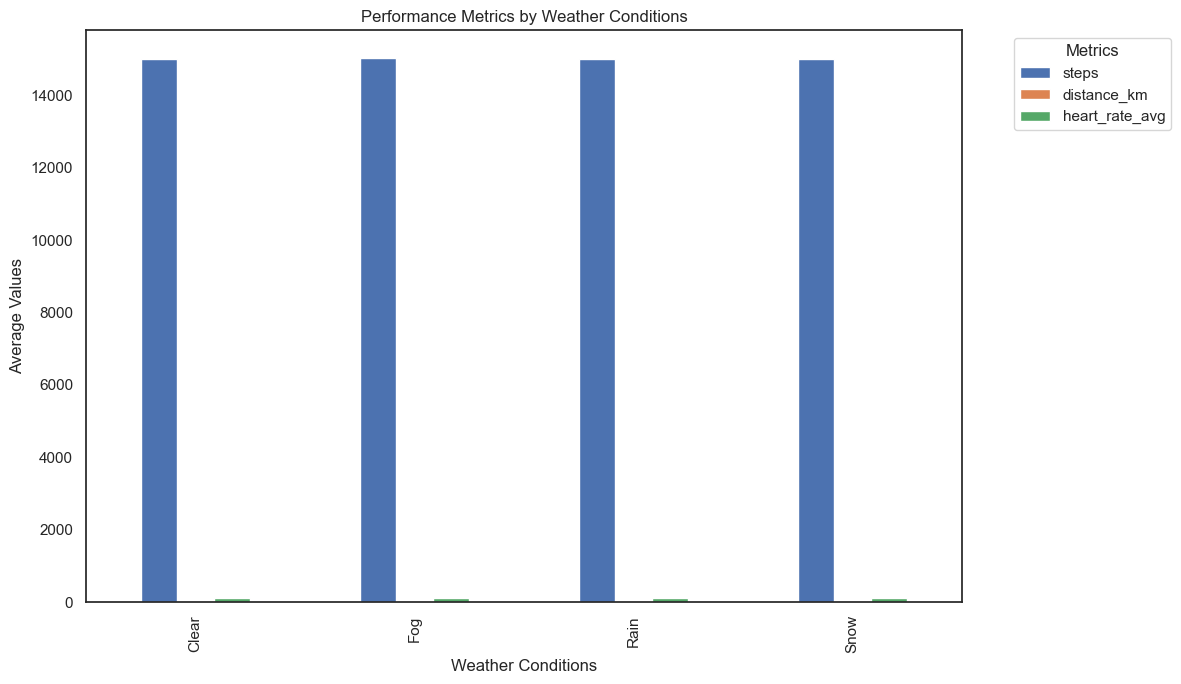

In [15]:
performance_by_weather = df.groupby('weather_conditions')[['steps', 'distance_km', 'heart_rate_avg']].mean()

performance_by_weather.plot(kind='bar', figsize=(12, 7))
plt.title('Performance Metrics by Weather Conditions')
plt.ylabel('Average Values')
plt.xlabel('Weather Conditions')
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

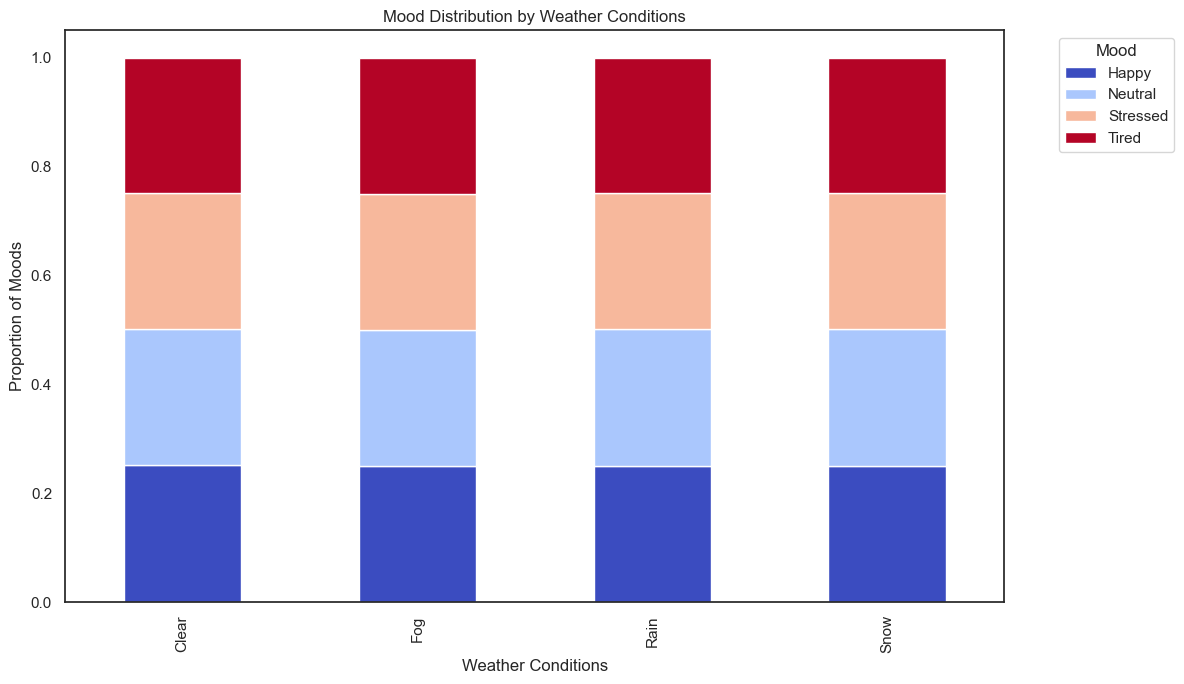

In [16]:
mood_by_weather = df.groupby('weather_conditions')['mood'].value_counts(normalize=True).unstack()

mood_by_weather.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="coolwarm")
plt.title('Mood Distribution by Weather Conditions')
plt.ylabel('Proportion of Moods')
plt.xlabel('Weather Conditions')
plt.legend(title="Mood", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()